In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## PREPARATION

In [ ]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## READ DATA

In [ ]:
#import drive indah
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/data/data_fix.csv")

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/Big Data/data_fix.csv")


In [ ]:
df

,created_at,full_text,username
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486
...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"Catatan_SJ"",,,,,,,,,,,,"
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"newsunsoed"",,,,,,,,,,,,"
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"Catatan_SJ"",,,,,,,,,,,,"
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,"mwuntu,,,,,,,,,,,,,,"


## Mengubah nama kolom

In [ ]:
df.columns = ['Datetime', 'Tweet', 'Username']

In [ ]:
df

,Datetime,Tweet,Username
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486
...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"Catatan_SJ"",,,,,,,,,,,,"
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"newsunsoed"",,,,,,,,,,,,"
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,"Catatan_SJ"",,,,,,,,,,,,"
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,"mwuntu,,,,,,,,,,,,,,"


## Pre-Processing

###normalisasi data/mengubah teks menjadi huruf kecil

In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower() # lowercase text
    return lwr
# Buat kolom tambahan untuk data description yang telah dicasefolding
df['lwr'] = df['Tweet'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,@sanimeetsunny @sleepmorejoe @salwaa222 @tanya...
1,"bukan hanya pejabat atas, pejabat dibawah pun ..."
2,@budak_pejabat cukup cukup aja. yg bikin ga cu...
3,netizen+62 di lawan...kelar lu🙊\n\nviralnya ko...
4,cek semua pejabat yg hedon\ncek semua harta oe...
...,...
15864,pejabat hidup bermewah-mewah patut dicurigai: ...
15865,pejabat hidup bermewah-mewah patut dicurigai: ...
15866,pejabat hidup bermewah-mewah patut dicurigai: ...
15867,rt @detikcom: hai pejabat! jangan bangga hidup...


###cleaning data

#### Menghilangkan simbol (,) dan (") pada kolom username

In [ ]:
cols_to_change = ['Username']

In [ ]:
for col in cols_to_change:
    df[col] = df[col].str.replace('[,]', '')

<ipython-input-10-18ef7f2a628d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('[,]', '')


In [ ]:
for col in cols_to_change:
    df[col] = df[col].str.replace('["]', '')

<ipython-input-11-0d355bfc3d3c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace('["]', '')


In [ ]:
df

,Datetime,Tweet,Username,lwr
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik,@sanimeetsunny @sleepmorejoe @salwaa222 @tanya...
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara,"bukan hanya pejabat atas, pejabat dibawah pun ..."
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi,@budak_pejabat cukup cukup aja. yg bikin ga cu...
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85,netizen+62 di lawan...kelar lu🙊\n\nviralnya ko...
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486,cek semua pejabat yg hedon\ncek semua harta oe...
...,...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,newsunsoed,pejabat hidup bermewah-mewah patut dicurigai: ...
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,mwuntu,rt @detikcom: hai pejabat! jangan bangga hidup...


#### Menghilangkan data duplicate

In [ ]:
df.duplicated(subset=('Tweet')).sum()

759

In [ ]:
df = df.drop_duplicates(subset=['Tweet'])

In [ ]:
# cek lagi
df.duplicated(subset=('Tweet')).sum()

0

### mengecek nilai Na

In [ ]:
df.isna().sum()

Datetime    0
Tweet       0
Username    2
lwr         0
dtype: int64

##### karena ini yang na nya username jadi datanya ga dihapus

#### menghapus karakter aneh, link web, emoji, dll

In [ ]:
def filtering(review):
    # Remove link web
    review = re.sub(r'http\S+', '', review)
    # Remove @username
    review = re.sub('@[^\s]+', '', review)
    # Remove #tagger
    review = re.sub(r'#([^\s]+)', '', review)
    # Remove angka termasuk angka yang berada dalam string
    # Remove non ASCII chars
    review = re.sub(r'[^\x00-\x7f]', r'', review)
    review = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', review)
    review = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", review)
    review = re.sub(r'\\u\w\w\w\w', '', review)
    # Remove simbol, angka dan karakter aneh
    review = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", review)
    return review

In [ ]:
df['filtering'] = df['lwr'].apply(filtering)
df['filtering']

<ipython-input-18-870a887bfd8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtering'] = df['lwr'].apply(filtering)


0            sabar bang  belio lg bela in pejabat hedon...
1        bukan hanya pejabat atas  pejabat dibawah pun ...
2         cukup cukup aja  yg bikin ga cukup biasanya b...
3        netizen    di lawan   kelar lu n nviralnya kon...
4        cek semua pejabat yg hedon ncek semua harta oe...
                               ...                        
15864    pejabat hidup bermewah mewah patut dicurigai  ...
15865    pejabat hidup bermewah mewah patut dicurigai  ...
15866    pejabat hidup bermewah mewah patut dicurigai  ...
15867    rt  hai pejabat  jangan bangga hidup mewah dar...
15868    pejabat hidup bermewah mewah patut dicurigai  ...
Name: filtering, Length: 15110, dtype: object

In [ ]:
#remove emoji
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
df['filtering'] = df['filtering'].apply(remove_emojis)
df['filtering']

<ipython-input-19-65af0d2f51d9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtering'] = df['filtering'].apply(remove_emojis)


0            sabar bang  belio lg bela in pejabat hedon...
1        bukan hanya pejabat atas  pejabat dibawah pun ...
2         cukup cukup aja  yg bikin ga cukup biasanya b...
3        netizen    di lawan   kelar lu n nviralnya kon...
4        cek semua pejabat yg hedon ncek semua harta oe...
                               ...                        
15864    pejabat hidup bermewah mewah patut dicurigai  ...
15865    pejabat hidup bermewah mewah patut dicurigai  ...
15866    pejabat hidup bermewah mewah patut dicurigai  ...
15867    rt  hai pejabat  jangan bangga hidup mewah dar...
15868    pejabat hidup bermewah mewah patut dicurigai  ...
Name: filtering, Length: 15110, dtype: object

#### menghapus double atau lebih whitespace

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")
df['clean_double_ws'] = df['filtering'].apply(_normalize_whitespace)
df['clean_double_ws']

<ipython-input-20-2597aa2dd6a6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_double_ws'] = df['filtering'].apply(_normalize_whitespace)


0        sabar bang belio lg bela in pejabat hedon yg n...
1        bukan hanya pejabat atas pejabat dibawah pun y...
2        cukup cukup aja yg bikin ga cukup biasanya bia...
3        netizen di lawan kelar lu n nviralnya kondisi ...
4        cek semua pejabat yg hedon ncek semua harta oe...
                               ...                        
15864    pejabat hidup bermewah mewah patut dicurigai j...
15865    pejabat hidup bermewah mewah patut dicurigai j...
15866    pejabat hidup bermewah mewah patut dicurigai j...
15867    rt hai pejabat jangan bangga hidup mewah dari ...
15868    pejabat hidup bermewah mewah patut dicurigai j...
Name: clean_double_ws, Length: 15110, dtype: object

In [ ]:
df

,Datetime,Tweet,Username,lwr,filtering,clean_double_ws
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik,@sanimeetsunny @sleepmorejoe @salwaa222 @tanya...,sabar bang belio lg bela in pejabat hedon...,sabar bang belio lg bela in pejabat hedon yg n...
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara,"bukan hanya pejabat atas, pejabat dibawah pun ...",bukan hanya pejabat atas pejabat dibawah pun ...,bukan hanya pejabat atas pejabat dibawah pun y...
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi,@budak_pejabat cukup cukup aja. yg bikin ga cu...,cukup cukup aja yg bikin ga cukup biasanya b...,cukup cukup aja yg bikin ga cukup biasanya bia...
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85,netizen+62 di lawan...kelar lu🙊\n\nviralnya ko...,netizen di lawan kelar lu n nviralnya kon...,netizen di lawan kelar lu n nviralnya kondisi ...
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486,cek semua pejabat yg hedon\ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...
...,...,...,...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,newsunsoed,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,mwuntu,rt @detikcom: hai pejabat! jangan bangga hidup...,rt hai pejabat jangan bangga hidup mewah dar...,rt hai pejabat jangan bangga hidup mewah dari ...


## Stopwords dan Tokenize

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
#clean stopwords
stop_words = set(stopwords.words('indonesian'))

In [ ]:
# Remove stopwords and remove words with 2 or less characters using gensim
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [ ]:
# Apply the function to the dataframe
df['clean'] = df['clean_double_ws'].apply(preprocess)

<ipython-input-27-3a7201bef3ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['clean_double_ws'].apply(preprocess)


In [ ]:
df

,Datetime,Tweet,Username,lwr,filtering,clean_double_ws,clean
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik,@sanimeetsunny @sleepmorejoe @salwaa222 @tanya...,sabar bang belio lg bela in pejabat hedon...,sabar bang belio lg bela in pejabat hedon yg n...,"[sabar, bang, belio, bela, pejabat, hedon, nyu..."
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara,"bukan hanya pejabat atas, pejabat dibawah pun ...",bukan hanya pejabat atas pejabat dibawah pun ...,bukan hanya pejabat atas pejabat dibawah pun y...,"[pejabat, pejabat, dibawah, kelakuannya, hedon..."
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi,@budak_pejabat cukup cukup aja. yg bikin ga cu...,cukup cukup aja yg bikin ga cukup biasanya b...,cukup cukup aja yg bikin ga cukup biasanya bia...,"[bikin, biaya, hedon, weekend, bermewah, ngiku..."
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85,netizen+62 di lawan...kelar lu🙊\n\nviralnya ko...,netizen di lawan kelar lu n nviralnya kon...,netizen di lawan kelar lu n nviralnya kondisi ...,"[netizen, lawan, kelar, nviralnya, kondisi, la..."
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486,cek semua pejabat yg hedon\ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...,"[pejabat, hedon, ncek, harta, oejabat]"
...,...,...,...,...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur..."
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,newsunsoed,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur..."
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur..."
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,mwuntu,rt @detikcom: hai pejabat! jangan bangga hidup...,rt hai pejabat jangan bangga hidup mewah dar...,rt hai pejabat jangan bangga hidup mewah dari ...,"[pejabat, bangga, hidup, mewah, uang, negara]"


In [ ]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

<ipython-input-48-adfe131cbe14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))


In [ ]:
df

,Datetime,Tweet,Username,lwr,filtering,clean_double_ws,clean,tweet_tokens_stemmed,clean_joined,stemmed_joined
0,Tue May 09 05:46:33 +0000 2023,@sanimeetsunny @sleepmoreJoe @salwaa222 @tanya...,jusbibkik,@sanimeetsunny @sleepmorejoe @salwaa222 @tanya...,sabar bang belio lg bela in pejabat hedon...,sabar bang belio lg bela in pejabat hedon yg n...,"[sabar, bang, belio, bela, pejabat, hedon, nyu...","[sabar, bang, belio, bela, jabat, hedon, nyuru...",sabar bang belio bela pejabat hedon nyuruh pak...,sabar bang belio bela jabat hedon nyuruh pake ...
1,Tue May 09 00:00:15 +0000 2023,"Bukan hanya pejabat atas, pejabat dibawah pun ...",HaryNagara,"bukan hanya pejabat atas, pejabat dibawah pun ...",bukan hanya pejabat atas pejabat dibawah pun ...,bukan hanya pejabat atas pejabat dibawah pun y...,"[pejabat, pejabat, dibawah, kelakuannya, hedon...","[jabat, jabat, bawah, laku, hedon, pantau, lap...",pejabat pejabat dibawah kelakuannya hedon pant...,jabat jabat bawah laku hedon pantau lapor vira...
2,Wed May 10 14:41:42 +0000 2023,@Budak_Pejabat Cukup cukup aja. Yg bikin ga cu...,minumtolakangi,@budak_pejabat cukup cukup aja. yg bikin ga cu...,cukup cukup aja yg bikin ga cukup biasanya b...,cukup cukup aja yg bikin ga cukup biasanya bia...,"[bikin, biaya, hedon, weekend, bermewah, ngiku...","[bikin, biaya, hedon, weekend, mewah, ngikutin...",bikin biaya hedon weekend bermewah ngikutin ge...,bikin biaya hedon weekend mewah ngikutin gengsi
3,Wed May 10 15:34:18 +0000 2023,Netizen+62 di lawan...kelar lu🙊\n\nViralnya Ko...,Aryprasetyo85,netizen+62 di lawan...kelar lu🙊\n\nviralnya ko...,netizen di lawan kelar lu n nviralnya kon...,netizen di lawan kelar lu n nviralnya kondisi ...,"[netizen, lawan, kelar, nviralnya, kondisi, la...","[netizen, lawan, kelar, nviralnya, kondisi, la...",netizen lawan kelar nviralnya kondisi lampung ...,netizen lawan kelar nviralnya kondisi lampung ...
4,Tue May 09 16:18:19 +0000 2023,Cek semua pejabat yg hedon\nCek semua harta oe...,Ihsan190486,cek semua pejabat yg hedon\ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...,cek semua pejabat yg hedon ncek semua harta oe...,"[pejabat, hedon, ncek, harta, oejabat]","[jabat, hedon, ncek, harta, oejabat]",pejabat hedon ncek harta oejabat,jabat hedon ncek harta oejabat
...,...,...,...,...,...,...,...,...,...,...
15864,Sat Nov 12 13:26:17 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur...","[jabat, hidup, mewah, mewah, patut, curiga, ja...",pejabat hidup bermewah mewah patut dicurigai j...,jabat hidup mewah mewah patut curiga jakarta c...
15865,Sat Nov 12 13:26:18 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,newsunsoed,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur...","[jabat, hidup, mewah, mewah, patut, curiga, ja...",pejabat hidup bermewah mewah patut dicurigai j...,jabat hidup mewah mewah patut curiga jakarta c...
15866,Sat Nov 12 13:26:21 +0000 2011,Pejabat Hidup Bermewah-Mewah Patut Dicurigai: ...,Catatan_SJ,pejabat hidup bermewah-mewah patut dicurigai: ...,pejabat hidup bermewah mewah patut dicurigai ...,pejabat hidup bermewah mewah patut dicurigai j...,"[pejabat, hidup, bermewah, mewah, patut, dicur...","[jabat, hidup, mewah, mewah, patut, curiga, ja...",pejabat hidup bermewah mewah patut dicurigai j...,jabat hidup mewah mewah patut curiga jakarta c...
15867,Sat Nov 12 13:55:23 +0000 2011,RT @detikcom: Hai Pejabat! Jangan Bangga Hidup...,mwuntu,rt @detikcom: hai pejabat! jangan bangga hidup...,rt hai pejabat jangan bangga hidup mewah dar...,rt hai pejabat jangan bangga hidup mewah dari ...,"[pejabat, bangga, hidup, mewah, uang, negara]","[jabat, bangga, hidup, mew

In [ ]:
from google.colab import files
df.to_csv('data_bersih.csv')
files.download('data_bersih.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Menghitung frekuensi setiap kata

In [ ]:
allWords1 = ' '.join([twts for twts in df['clean_joined']])
allWords1

'sabar bang belio bela pejabat hedon nyuruh pake hati nurani lahelah hati nurani kudu dipake tong malu belain pejabat hedon bagus dmnnya pejabat pejabat dibawah kelakuannya hedon pantau lapor viralkan nudah kronis penyakit bangsa rakyat wajib mengobatinya bikin biaya hedon weekend bermewah ngikutin gengsi netizen lawan kelar nviralnya kondisi lampung media sosial gubernur menyerah npemerintah provinsi lampung henti diterjang gelombang viral bernada kritik jalan rusak pejabat hedon pajak kendaraan dinas telat bayar pejabat hedon ncek harta oejabat nwartawan mewakili netizen nscroll keluarga nekat sekolah jawa hidupnya hedon anak pejabat daerah pejabat onoh ntak pejabat bergaya hedon ditunjukan bupati sumenep achmad fauzi nsikap sederhana bupati sumenep sengaja terekam kamera warga viral media sosial  aneh negara sampe terbayarkan alasan pejabat negara hedon rakyat kerja sungguh sungguh miskin wkwkwkw anies sedih gaya hedon pejabat negri sederhana orangnya tetep sederhana beda ughtea ist

In [ ]:
words1 = allWords1.split()

In [ ]:
frekuensi_tokens = nltk.FreqDist(words1)
print('\n\nFrekuensi Tokens : \n')
print(frekuensi_tokens.most_common())



Frekuensi Tokens : 

[('pejabat', 16859), ('hidup', 10566), ('mewah', 8321), ('hedon', 5056), ('gaya', 4215), ('flexing', 3335), ('anak', 2216), ('rakyat', 2214), ('negara', 1554), ('pajak', 1461), ('istri', 1318), ('korupsi', 1287), ('ketua', 1152), ('harta', 1057), ('pamer', 943), ('bergaya', 770), ('keluarga', 729), ('mobil', 682), ('sederhana', 671), ('suka', 656), ('publik', 654), ('uang', 649), ('penampilan', 642), ('bermewah', 599), ('kalo', 592), ('orang', 590), ('china', 546), ('kekayaan', 544), ('indonesia', 524), ('presiden', 521), ('kaya', 517), ('susah', 492), ('perilaku', 492), ('masyarakat', 475), ('menteri', 462), ('glamor', 452), ('gaji', 441), ('ketum', 441), ('ikahi', 424), ('pakai', 420), ('duit', 388), ('menular', 383), ('beli', 380), ('kritik', 374), ('singgung', 371), ('bangsa', 367), ('rapimnas', 367), ('ldii', 367), ('makan', 358), ('korup', 353), ('busyro', 352), ('sosial', 350), ('hasil', 349), ('sikap', 349), ('serba', 349), ('keluarganya', 347), ('udah', 

In [ ]:
df_frekuensi_tokens = pd.DataFrame.from_dict(frekuensi_tokens, orient='index')

## Wordcloud

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [ ]:
wordcloud1 = WordCloud(collocations=False,width=1600, height=800, max_font_size=200, background_color='white').generate(allWords1)

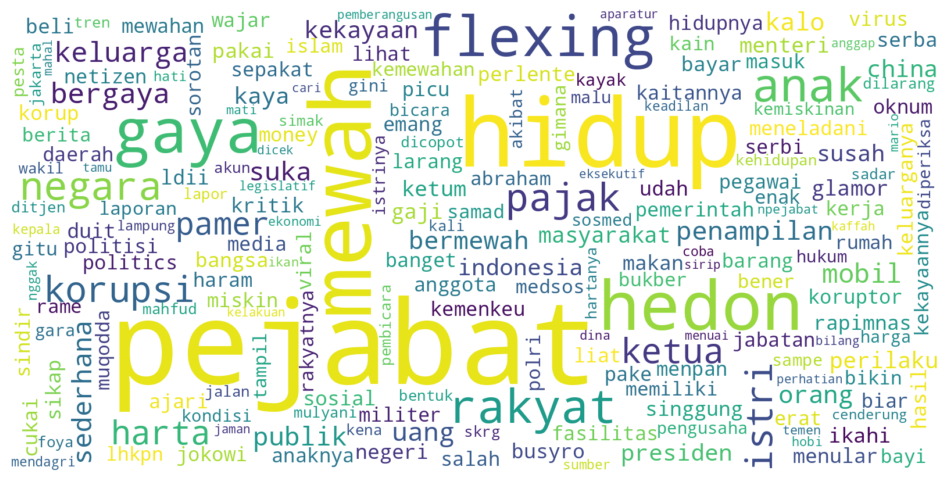

In [ ]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud1, interpolation='bilinear')

plt.axis("off")

plt.show()

## Word count

In [ ]:
from collections import Counter
Counter(" ".join(df.clean_joined).split()).most_common(10)

[('pejabat', 16859),
 ('hidup', 10566),
 ('mewah', 8321),
 ('hedon', 5056),
 ('gaya', 4215),
 ('flexing', 3335),
 ('anak', 2216),
 ('rakyat', 2214),
 ('negara', 1554),
 ('pajak', 1461)]

##Data Frame untuk Word Count

In [ ]:
#ini biar gausah run dari awal lagi kalo misal mau run dari sini
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df1 = pd.read_csv("/content/drive/My Drive/Big Data/datapaper2.csv")
df2 = df1.astype(str)

Mounted at /content/drive


In [ ]:
import pandas as pd
from collections import Counter

df=df.astype(str)

word_count = Counter(" ".join(df.clean_joined).split()).most_common(10)
df_word_count = pd.DataFrame(word_count, columns=["Word", "Count"])

In [ ]:
# Memanggil 10 data teratas dari DataFrame
top_10_words = df_word_count.head(10)

# Menampilkan DataFrame dengan 10 data teratas
print(top_10_words)

      Word  Count
0  pejabat  16859
1    hidup  10566
2    mewah   8321
3    hedon   5056
4     gaya   4215
5  flexing   3335
6     anak   2216
7   rakyat   2214
8   negara   1554
9    pajak   1461


In [ ]:
df_top = df_word_count.head(10)
df_top

,Word,Count
0,pejabat,16859
1,hidup,10566
2,mewah,8321
3,hedon,5056
4,gaya,4215
5,flexing,3335
6,anak,2216
7,rakyat,2214
8,negara,1554
9,pajak,1461


## Pie Chart

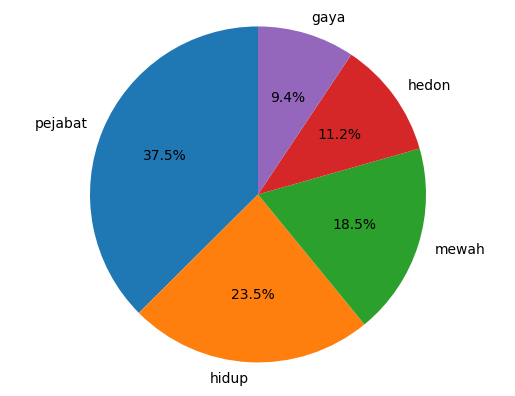

In [ ]:
import matplotlib.pyplot as plt

df_top = df_word_count.head(5)

labels= df_top["Word"].tolist()

sizes= df_top["Count"].tolist()

plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

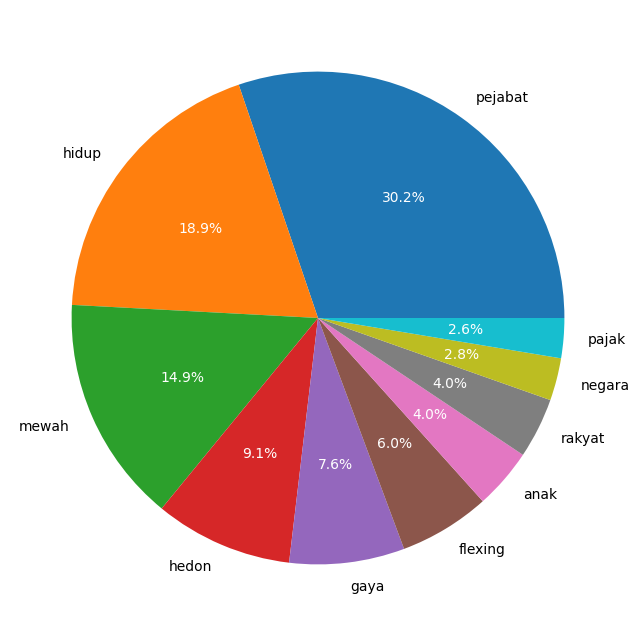

In [ ]:
import matplotlib.pyplot as plt

labels= df_top["Word"].tolist()

sizes= df_top["Count"].tolist()

fig, ax = plt.subplots(figsize=(8, 8))
_, _, text = ax.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 10})

# Mengatur ukuran tulisan pada persen
plt.rcParams['font.size'] = 8

# Mengubah warna tulisan
for t in text:
    t.set_color('white')

# Menampilkan pie chart
plt.show()


##Pattern - Network Explorer dengan keterhubungan degree centrality

In [ ]:
#import data dari drive indah
df = pd.read_csv('/content/drive/MyDrive/data/datapaper2.csv')

In [ ]:
df = df.astype(str)

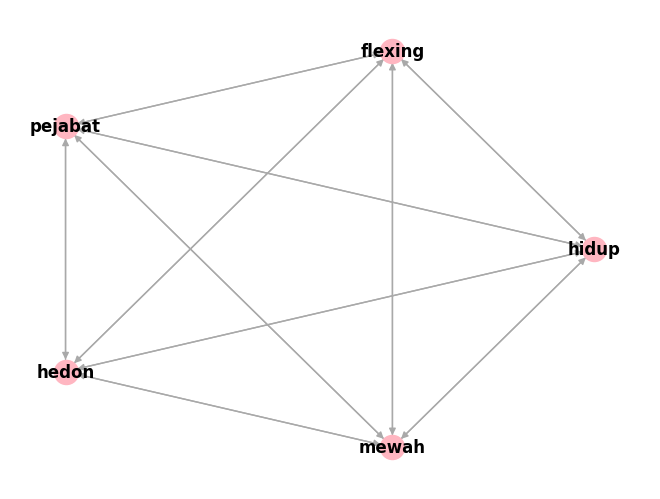

In [ ]:
#berdasarkan degree centrality
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Ambil token dari data frame dan hitung degree centrality
tokens = df['clean_joined'].str.split()

# Inisialisasi jaringan
G = nx.DiGraph()

# Tambahkan node dan edge ke jaringan
for i, token_list in enumerate(tokens):
    for token in token_list:
        G.add_node(token)
        for other_token in token_list:
            if token != other_token:
                G.add_edge(token, other_token)

# Hitung degree centrality untuk setiap node
degree_centrality = nx.degree_centrality(G)

# Sort degree centrality dari tertinggi ke terendah
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Ambil 5 degree centrality tertinggi
top_degree_centrality = sorted_degree_centrality[:5]

# Buat subgraph hanya dengan 5 degree centrality tertinggi
subgraph = G.subgraph([node for node, _ in top_degree_centrality])

# Visualisasi jaringan
pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, node_color='lightpink', edge_color='darkgrey', font_weight='bold', font_color='black')


# Tampilkan plot
plt.show()

